In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2021_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,14850,해운대구,7425,100.0%,"10,150"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),14444,해운대구,18181,해운대구,3737,25.87%,"16,839"
3,2021-01-07,고등어,30㎝정도 500g 1마리,4761,해운대구,5708,해운대구,947,19.89%,"5,186"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,해운대구,3180,해운대구,200,6.71%,"3,050"
5,2021-01-07,닭고기,육계 1.0㎏,5300,해운대구,8112,해운대구,2812,53.06%,"7,046"
6,2021-01-07,대파,1.0㎏,3228,해운대구,4290,해운대구,1062,32.9%,"3,906"
7,2021-01-07,돼지고기,삼겹살 500g,9900,해운대구,11950,해운대구,2050,20.71%,"10,583"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4879,해운대구,5194,해운대구,315,6.46%,"5,015"
9,2021-01-07,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2021_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,8175,해운대구,750,10.1%,"7,675"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),14142,해운대구,18181,해운대구,4039,28.56%,"15,978"
3,2021-04-08,달걀,오경슈퍼란60g정도 10개,3750,해운대구,3890,해운대구,140,3.73%,"3,807"
4,2021-04-08,닭고기,육계 1.0㎏,5100,해운대구,8223,해운대구,3123,61.24%,"6,933"
5,2021-04-08,대파,1.0㎏,5956,해운대구,8848,해운대구,2892,48.56%,"7,069"
6,2021-04-08,돼지고기,삼겹살 500g,9900,해운대구,17950,해운대구,8050,81.31%,"12,867"
7,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
8,2021-04-08,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2021-04-08,맥주,하이트 500㎖ 1병,1410,해운대구,1540,해운대구,130,9.22%,"1,463"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2021_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,11925,해운대구,4500,60.61%,"9,175"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),11029,해운대구,16666,해운대구,5637,51.11%,"13,772"
3,2021-07-08,달걀,오경슈퍼란60g정도 10개,3980,해운대구,4680,해운대구,700,17.59%,"4,220"
4,2021-07-08,닭고기,육계 1.0㎏,4980,해운대구,8737,해운대구,3757,75.44%,"6,939"
5,2021-07-08,대파,1.0㎏,1814,해운대구,2790,해운대구,976,53.8%,"2,309"
6,2021-07-08,돼지고기,삼겹살 500g,12400,해운대구,16450,해운대구,4050,32.66%,"14,200"
7,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
8,2021-07-08,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2021-07-08,맥주,하이트 500㎖ 1병,1410,해운대구,1540,해운대구,130,9.22%,"1,463"


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2021_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6583,해운대구,11925,해운대구,5342,81.15%,"8,894"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,6829,해운대구,7250,해운대구,421,6.16%,"7,020"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),9642,해운대구,16666,해운대구,7024,72.85%,"12,047"
3,2021-10-07,고등어,30㎝정도 500g 1마리,3239,해운대구,6524,해운대구,3285,101.42%,"5,405"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3650,해운대구,4000,해운대구,350,9.59%,"3,877"
5,2021-10-07,닭고기,육계 1.0㎏,4980,해운대구,9362,해운대구,4382,87.99%,"6,714"
6,2021-10-07,대파,1.0㎏,2519,해운대구,3290,해운대구,771,30.61%,"2,855"
7,2021-10-07,돼지고기,삼겹살 500g,12400,해운대구,14950,해운대구,2550,20.56%,"13,750"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
9,2021-10-07,라면,신라면 120g 1봉지,734,해운대구,736,해운대구,2,0.27%,735


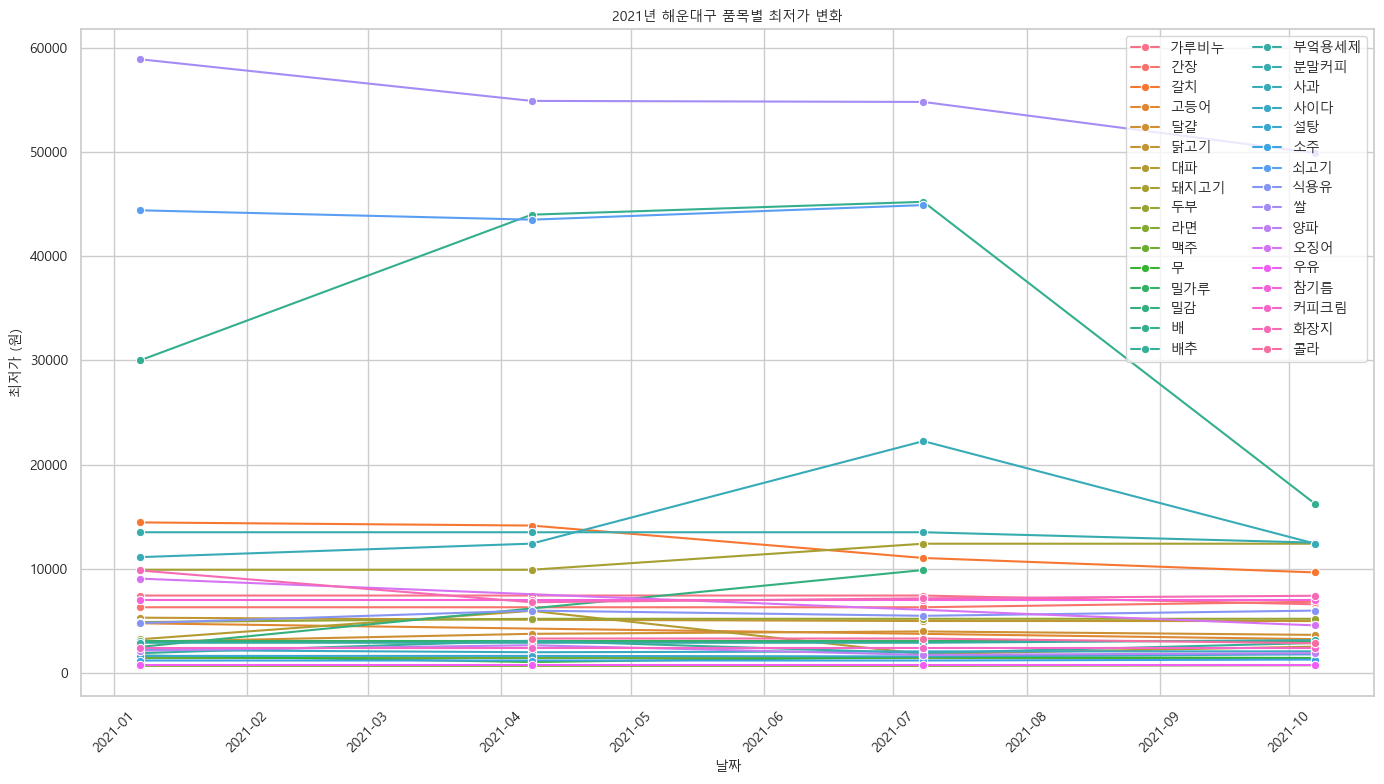

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2021_1q.csv")
q2 = pd.read_csv("해운대구2021_2q.csv")
q3 = pd.read_csv("해운대구2021_3q.csv")
q4 = pd.read_csv("해운대구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2021_min.csv", index=False, encoding="utf-8-sig")

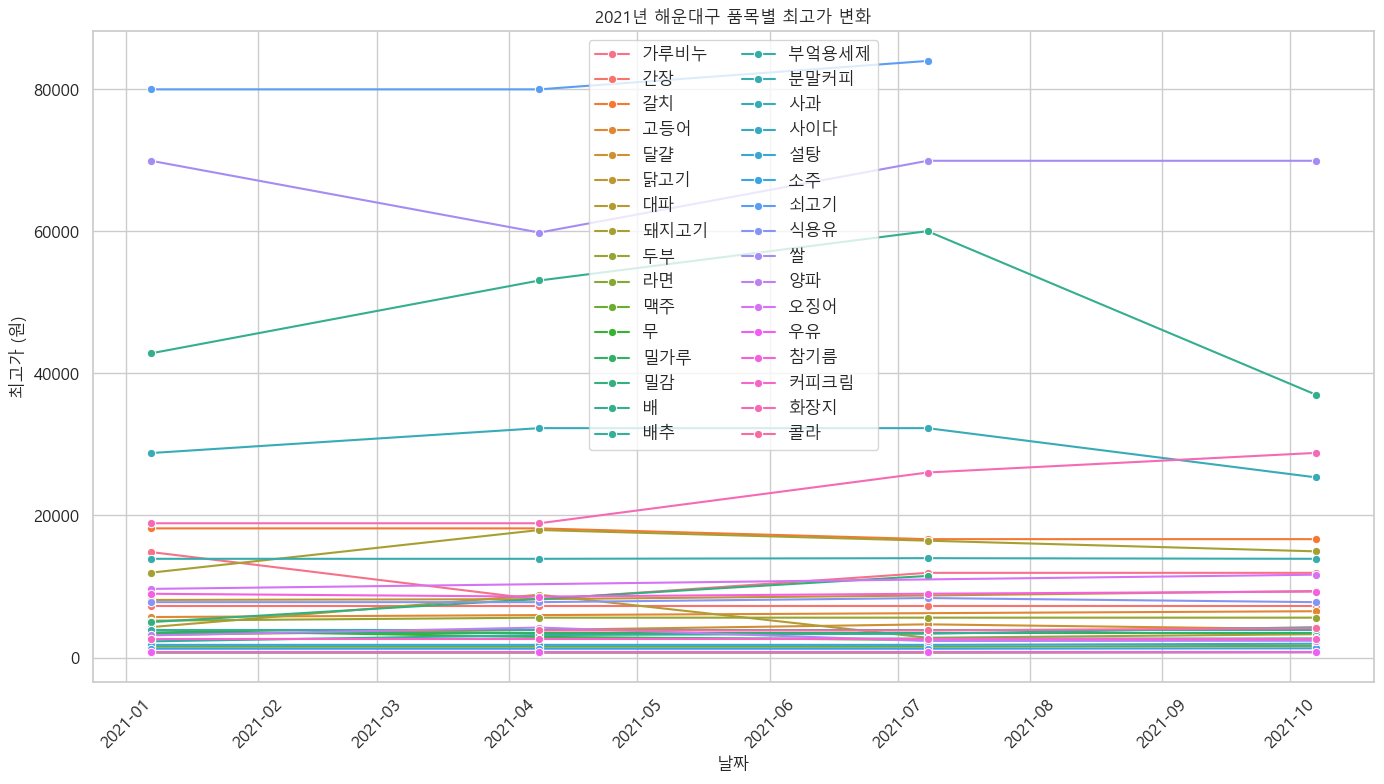

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2021_1q.csv")
q2 = pd.read_csv("해운대구2021_2q.csv")
q3 = pd.read_csv("해운대구2021_3q.csv")
q4 = pd.read_csv("해운대구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2021_max.csv", index=False, encoding="utf-8-sig")